## Search Tree -> Similar Words

In [7]:
!pip install jieba

Looking in indexes: http://pypi.douban.com/simple
  Created wheel for jieba: filename=jieba-0.39-cp35-none-any.whl size=7282603 sha256=69da7e7ea22f8f12e30ae17025df9d8d0b10669342fa9d07a2c93477a0363166
  Stored in directory: C:\Users\7153678\AppData\Local\pip\Cache\wheels\f9\f6\9d\02ac6ba74c56da67e49dfe05166b4bc88f3d8f938d772d9dd0
Successfully built jieba


In [48]:
csv_path = r'C:\Users\7153678\Desktop\AI\src\nlp\data\sqlResult_1558435.csv'

In [49]:
import pandas as pd

In [50]:
content = pd.read_csv(csv_path, encoding='gb18030')

In [51]:
content = content.fillna('')

In [52]:
news_content = content['content'].tolist()

In [53]:
import jieba

In [54]:
def cut(string): return ' '.join(jieba.cut(string))

In [55]:
cut('这是一个测试')

'这是 一个 测试'

In [56]:
import re

In [57]:
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [58]:
token('这是一个测试\n\n\n')

['这是一个测试']

In [59]:
news_content = [token(n) for n in news_content]

In [60]:
news_content = [' '.join(n) for n in news_content]

In [61]:
news_content = [cut(n) for n in news_content]

In [62]:
news_content[1]

'骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台'

In [63]:
with open('news-sentences-cut.txt', 'w') as f:
    for n in news_content:
        f.write(n + '\n')

In [17]:
from gensim.models import Word2Vec

C:\ProgramData\Anaconda3\envs\nlp\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [18]:
from gensim.models.word2vec import LineSentence

In [ ]:
news_word2ve= Word2Vec(LineSentence('news-sentences-cut.txt'), size=35, workers=8)

In [ ]:
news_word2ve.most_similar('葡萄牙', topn=20)

## More Date, Better Results

1. 分词的问题
2. **数据量**，数据越多，效果越好，维基百科加进来，那么同义词就要好很多。

In [ ]:
news_word2ve.most_similar('捷克', topn=20)

In [ ]:
news_word2ve.most_similar('说', topn=30)

In [ ]:
news_word2ve.most_similar('认为', topn=30)

In [ ]:
news_word2ve.most_similar('建议', topn=10)

In [19]:
from collections import defaultdict

In [26]:
import os
W2V_DATA_DIR = r'C:\Users\7153678\Desktop\AI\src\nlp\model\word2vec'  # word2vec模型目录的路径, trained by wiki
w2v_model_path = os.path.join(W2V_DATA_DIR, 'word2vec_wiki.model')
news_word2ve = Word2Vec.load(w2v_model_path)

C:\ProgramData\Anaconda3\envs\nlp\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [27]:
def get_related_words(initial_words, model):
    """
    @initial_words are initial words we already know
    @model is the word2vec model
    """
    
    unseen = initial_words
    
    seen = defaultdict(int)
    
    max_size = 500  # could be greater
    
    while unseen and len(seen) < max_size:
        if len(seen) % 50 == 0: 
            print('seen length : {}'.format(len(seen)))
            
        node = unseen.pop(0)
        
        new_expanding = [w for w, s in model.most_similar(node, topn=20)]
        
        unseen += new_expanding
        
        seen[node] += 1
        
        # optimal: 1. score function could be revised
        # optimal: 2. using dymanic programming to reduce computing time
    
    return seen

In [28]:
len(news_word2ve.wv.vocab)

508098

In [29]:
related_words = get_related_words(['说', '表示'], news_word2ve)

seen length : 0


C:\ProgramData\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


seen length : 50
seen length : 100
seen length : 150
seen length : 150
seen length : 150
seen length : 150
seen length : 200
seen length : 250
seen length : 300
seen length : 300
seen length : 300
seen length : 300
seen length : 350
seen length : 350
seen length : 400
seen length : 450


In [30]:
sorted(related_words.items(), key=lambda x: x[1], reverse=True)[0:50]

[('表示', 20),
 ('指出', 19),
 ('说', 15),
 ('声称', 13),
 ('宣称', 13),
 ('认为', 12),
 ('说道', 11),
 ('所言', 11),
 ('说明', 10),
 ('相信', 9),
 ('坚称', 9),
 ('透露', 9),
 ('提到', 8),
 ('确信', 8),
 ('辩称', 8),
 ('转述', 8),
 ('反驳', 8),
 ('坦承', 8),
 ('表明', 8),
 ('讲出', 8),
 ('强调', 7),
 ('写道', 7),
 ('还说', 7),
 ('断言', 7),
 ('则说', 7),
 ('否认', 7),
 ('表示歉意', 7),
 ('所说', 7),
 ('暗示', 7),
 ('答道', 6),
 ('地问', 6),
 ('反问', 6),
 ('驳斥', 6),
 ('问道', 6),
 ('指称', 6),
 ('坦言', 6),
 ('澄清', 6),
 ('说过', 6),
 ('指责', 5),
 ('表达', 5),
 ('引述', 5),
 ('质问', 5),
 ('觉得', 5),
 ('讲', 5),
 ('要说', 4),
 ('自言', 4),
 ('道歉', 4),
 ('告诉', 4),
 ('暗指', 4),
 ('中说', 4)]

## TFIDF Key words

In [64]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息'

In [32]:
def document_frequency(word): 
    return sum(1 for n in news_content if word in n)

In [65]:
document_frequency('的')

70342

In [34]:
import math

In [35]:
def idf(word):
    """Gets the inversed document frequency"""
    return math.log10(len(news_content) / document_frequency(word))

In [66]:
idf('的') < idf('小米')

True

In [67]:
def tf(word, document):
    """
    Gets the term frequemcy of a @word in a @document.
    """
    words = document.split()
    
    return sum(1 for w in words if w == word)

In [70]:
tf('银行', news_content[11])

6

In [71]:
tf('创业板', news_content[11])

6

In [72]:
idf('创业板')

2.506757120518876

In [73]:
idf('银行')

1.4550169427748936

In [74]:
idf('短期')

1.9923664854640575

In [75]:
tf('短期',news_content[11])

3

In [76]:
def get_keywords_of_a_ducment(document):
    words = set(document.split())
    
    tfidf = [
        (w, tf(w, document) * idf(w)) for w in words
    ]
    
    tfidf = sorted(tfidf, key=lambda x: x[1], reverse=True)
    
    return tfidf

In [77]:
%prun get_keywords_of_a_ducment(news_content[0])

In [89]:
machine_new_keywords = get_keywords_of_a_ducment(news_content[4])

## Wordcloud

In [81]:
!pip install wordcloud

Looking in indexes: http://pypi.douban.com/simple


In [82]:
import wordcloud

In [83]:
wc = wordcloud.WordCloud(r'C:\Users\7153678\Desktop\AI\src\nlp\data\SourceHanSerifSC-Regular.otf')
# we could download the font from https://github.com/Computing-Intelligence/datasource

In [88]:
news_content[4]

'原 标题   44 岁 女子 跑 深圳 约会 网友 被 拒   暴雨 中 裸身 奔走   深圳 交警 微博称   昨日 清晨 交警 发现 有 一 女子 赤裸 上身   行走 在 南坪 快速 上   期间 还 起 了 轻生 年头   一辅警 发现 后 赶紧 为 其 披上 黄衣   并 一路 劝说 她   那么 事发 时   到底 都 发生 了 些 什么 呢   南 都 记者 带 您 一起 还原 现场   南 都 记者 在 龙岗 大队 坂田 中队 见到 了 辅警 刘青   发现 女生 的 辅警   一位 外表 高大 帅气   说话 略带 些 腼腆 的 90 后 青年   刘青 介绍   6 月 16 日 早上 7 时 36 分   他 正在 环城 南路 附近 值勤   接到 中队 关于 一位 女子 裸身 进入 机动车 可能 有 危险 的 警情   随后 骑着 小 铁骑 开始 沿路 寻找   大概 花 了 十多分钟 在 南坪 大道 坂田 出口 往 龙岗 方向 的 逆行 辅道 上 发现 该 女子   女子 身上 一丝不挂 地逆 车流 而行   时 走时 停   时 坐 时 躺   险象环生   刘青停 好 小 铁骑   和 另外 一名 巡防 员 追 了 上去   发现 女子 的 情绪 很 低落   话 不 多   刘青 尝试 和 女子 交流   劝说 女子 离开   可 女子 并 不 愿意 接受   继续 缓慢 地往 南坪 快速路 的 主干道 上 走 去   此时 路边 上 已经 聚集 了 很 市民 围观   为了 不 刺激 女子 的 情绪   刘青 和 巡防 员 一边 盯 着 女子 一边 驱赶 着 围观 的 群众   现场 还原   从 警方 提供 的 一份 视频 了解 到   16 日 早上 7 时 25 分   女子 出现 在 坂雪岗 大道 与 环城 南路 的 监控 视频 中   此时 女子 还 穿着 白色 的 内裤   正 沿着 坂雪岗 大道 往 南坪 快速 的 方向 缓慢 地 走 着   当时 正值 上班 高峰期   十字路口 的 车流 已经 排起 了 长队   当 女子 出现 时   路上 的 市民 纷纷 驻足 观望   不少 车辆 也 放慢 了 速度   但 女子 并 不 为 市民 观望 停下 脚步   依然 缓慢 走 着   当 女子 行进 到 十字路口 

In [85]:
import matplotlib.pyplot as plt

In [86]:
%matplotlib inline

In [90]:
help(wc.generate_from_frequencies)

Help on method generate_from_frequencies in module wordcloud.wordcloud:

generate_from_frequencies(frequencies, max_font_size=None) method of wordcloud.wordcloud.WordCloud instance
    Create a word_cloud from words and frequencies.
    
    Parameters
    ----------
    frequencies : dict from string to float
        A contains words and associated frequency.
    
    max_font_size : int
        Use this font-size instead of self.max_font_size
    
    Returns
    -------
    self



In [91]:
machine_new_keywords_dict = {w: score for w, score in machine_new_keywords}

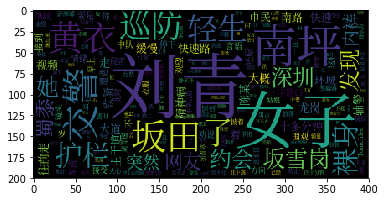

In [92]:
plt.imshow(wc.generate_from_frequencies(machine_new_keywords_dict))

In [ ]:
shenzhen_social_news = get_keywords_of_a_ducment(news_content[101])

In [ ]:
shenzhen_social_news

In [93]:
from PIL import Image

In [94]:
import numpy as np

In [ ]:
police_mask = np.array(Image.open('/Users/mqgao/Downloads/0034.png_860.png'))

In [ ]:
wordcloud_with_mask = wordcloud.WordCloud(
font_path='/Users/mqgao/Downloads/SourceHanSerifSC-Regular.otf', 
mask=police_mask
)

In [ ]:
plt.imshow(wc.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

In [ ]:
plt.imshow(wordcloud_with_mask.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

## TFIDF Vectorizezd

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [96]:
vectorized = TfidfVectorizer(max_features=10000)

In [98]:
sample_num = 50000
sub_samples = news_content[:sample_num]

In [99]:
X = vectorized.fit_transform(sub_samples)

In [100]:
X.shape

(50000, 10000)

In [101]:
np.where(X[0].toarray()) # get the positions which values are not zero

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([  35,   46,  302,  912,  933, 1546, 1743, 1819, 1844, 2558, 2635,
        2734, 3974, 4113, 4132, 4405, 4505, 4525, 4802, 4878, 5628, 5738,
        5760, 5808, 5892, 6195, 6880, 7319, 7338, 7607, 7662, 9082, 9141,
        9631], dtype=int64))

In [ ]:
news_content[0]

In [ ]:
vectorized.vocabulary_

In [103]:
import random 

In [104]:
document_id_1, document_id_2 = random.randint(0, 1000), random.randint(0, 1000)

In [105]:
document_id_1

702

In [ ]:
document_id_2

In [ ]:
news_content[document_id_1]

In [ ]:
news_content[document_id_2]

In [106]:
vector_of_d_1 = X[document_id_1].toarray()[0]

In [107]:
vector_of_d_2 = X[document_id_2].toarray()[0]

In [108]:
random_choose = random.randint(0, 1000)

In [ ]:
random_choose

In [ ]:
news_content[random_choose]

In [109]:
from scipy.spatial.distance import cosine

In [110]:
def distance(v1, v2): return cosine(v1, v2)

In [111]:
distance([1, 1], [2, 2])

0.0

In [ ]:
distance(X[random_choose].toarray()[0], X[document_id_1].toarray()[0])

In [ ]:
distance(X[random_choose].toarray()[0], X[document_id_2].toarray()[0])

In [ ]:
news_content[320]

In [ ]:
news_content[72]

In [ ]:
news_content[85]

In [ ]:
news_content[8]

In [ ]:
sorted(list(range(10000)), key=lambda i: distance(X[random_choose].toarray()[0], 
                                      X[i].toarray()[0]))

In [ ]:
2**64

In [ ]:
bin(19)

In [ ]:
bin(49)

In [ ]:
bin(38)

In [ ]:
bin(49 & 38)

## Build Search Engine 

```
Input: Words
Output: Documents
```

In [ ]:
def naive_search(keywords):
    news_ids = [i for i, n in enumerate(news_content) if all(w in n for w in keywords)]
    # O(D * w) 

In [ ]:
%%timeit
naive_search('美军 司令 航母'.split())

In [ ]:
len(news_content)

### Input word -> the documents which contain this word

In [ ]:
X.shape

In [ ]:
transposed_x = X.transpose().toarray()

In [ ]:
word_2_id = vectorized.vocabulary_

In [ ]:
word_2_id['今天']

In [ ]:
id_2_word = {d: w for w, d in word_2_id.items()}

In [ ]:
id_2_word[6195]

In [ ]:
set(np.where(transposed_x[6195])[0])

In [ ]:
'美军'

In [ ]:
word_2_id['美军']

In [ ]:
word_2_id['司令']

In [ ]:
usa_force = set(np.where(transposed_x[7922])[0])

In [ ]:
commander = set(np.where(transposed_x[2769])[0])

In [ ]:
usa_force & commander

In [ ]:
from functools import reduce

In [ ]:
d1, d2, d3 = {1, 2, 3}, {4, 5, 6, 3, 2}, {1, 3, 4}

In [ ]:
from operator import and_

In [ ]:
reduce(and_, [d1, d2, d3])

In [ ]:
def search_engine(query):
    """
    @query is the searched words, splited by space
    @return is the related documents which ranked by tfidf similarity
    """
    words = query.split()
    
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]

    candidates_ids = [word_2_id[w] for w in words]
    
    documents_ids = [
         set(np.where(transposed_x[_id])[0]) for _id in candidates_ids
    ]
    
    merged_documents = reduce(and_, documents_ids)
    # we could know the documents which contain these words
    sorted_docuemtns_id = sorted(merged_documents, key=lambda i: distance(query_vec, X[i].toarray()))

    return sorted_docuemtns_id

In [ ]:
np.where(vectorized.transform(['美联储 加息 次数']).toarray()[0])

In [ ]:
text = """新华社洛杉矶４月８日电（记者黄恒）美国第三舰队８日发布声明说，该舰队下属的“卡尔·文森”航母战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。\n　　该舰队网站主页发布的消息说，美军太平洋司令部司令哈里·哈里斯指示“卡尔·文森”航母战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号航母的母港位于美国加利福尼亚州的圣迭戈，今年１月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。\n　　美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。（完）"""

In [ ]:
print(text)

In [ ]:
import re

In [ ]:
text = """美国有线电视新闻网援引美国军方官员的话说"""

In [ ]:
pat = r'(新闻|官员)'

In [ ]:
re.compile(pat).sub(repl="**\g<1>**", string=text)

In [ ]:
def get_query_pat(query):
    return re.compile('({})'.format('|'.join(query.split())))

In [ ]:
get_query_pat('美军 司令 航母')

In [ ]:
def highlight_keywords(pat, document):
    return pat.sub(repl="**\g<1>**", string=document) 

In [ ]:
highlight_keywords(get_query_pat('美军 司令 航母'), content['content'][22987])

In [ ]:
from IPython.display import display, Markdown

In [ ]:
def search_engine_with_pretty_print(query):
    candidates_ids = search_engine(query)
    for i, _id in enumerate(candidates_ids):
        title = '## Search Result {}'.format(i)
        c = content['content'][_id]
        c = highlight_keywords(get_query_pat(query), c)    
        
        display(Markdown(title + '\n' + c))

In [ ]:
search_engine_with_pretty_print('春节 假期')

In [ ]:
search_engine()

In [ ]:
#%%timeit
search_engine('美联储 加息 次数')

In [ ]:
content['content'][2189]

## Why ?

```
preprocessing
```

## PageRank

In [ ]:
import networkx as nx

In [ ]:
import random

In [ ]:
from string import ascii_uppercase

In [ ]:
ascii_uppercase

In [ ]:
def genearte_random_website():
    return ''.join([random.choice(ascii_uppercase) for _ in range(random.randint(3, 5))]) + '.'  + random.choice(['com', 'cn', 'net'])

In [ ]:
genearte_random_website()

In [ ]:
websites = [genearte_random_website() for _ in range(25)]

In [ ]:
websites

In [ ]:
random.sample(websites, 10)

In [ ]:
website_connection = {
    websites[0]: random.sample(websites, 10),
    websites[1]: random.sample(websites, 5),
    websites[3]: random.sample(websites, 7),
    websites[4]: random.sample(websites, 2),
    websites[5]: random.sample(websites, 1),
}

In [ ]:
website_network = nx.graph.Graph(website_connection)

In [ ]:
plt.figure(3,figsize=(12,12))
nx.draw_networkx(website_network, font_size=10)

In [ ]:
sorted(nx.pagerank(website_network).items(),key=lambda x: x[1], reverse=True)